In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline
sns.set_style('whitegrid')

In [86]:
data_file = '/Users/nilvarshney/Google Drive/Machine Learning/PythonML/Datasets/creditcard.csv'
creditcard = pd.read_csv(data_file)


## Exploratory Data Analysis

In [87]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [88]:
# Missing values
print('No of Missing values :\t{}'.format(creditcard.isnull().sum().max()))

No of Missing values :	0


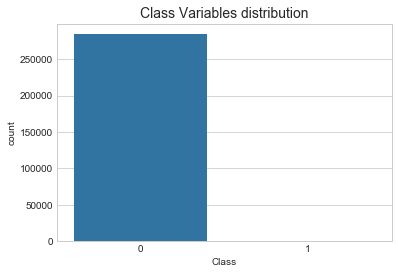

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [89]:
sns.countplot(data=creditcard,x = 'Class')
plt.title('Class Variables distribution', fontsize=14)
plt.show()

creditcard['Class'].value_counts() *100 /len(creditcard)

Imbalance class, only **0.17%** fraud case data against **99.83%** none fraud case data. There are couple of mathod can be used to handle imbalace data. 
- Up-sampling  
- Down-sampling

https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

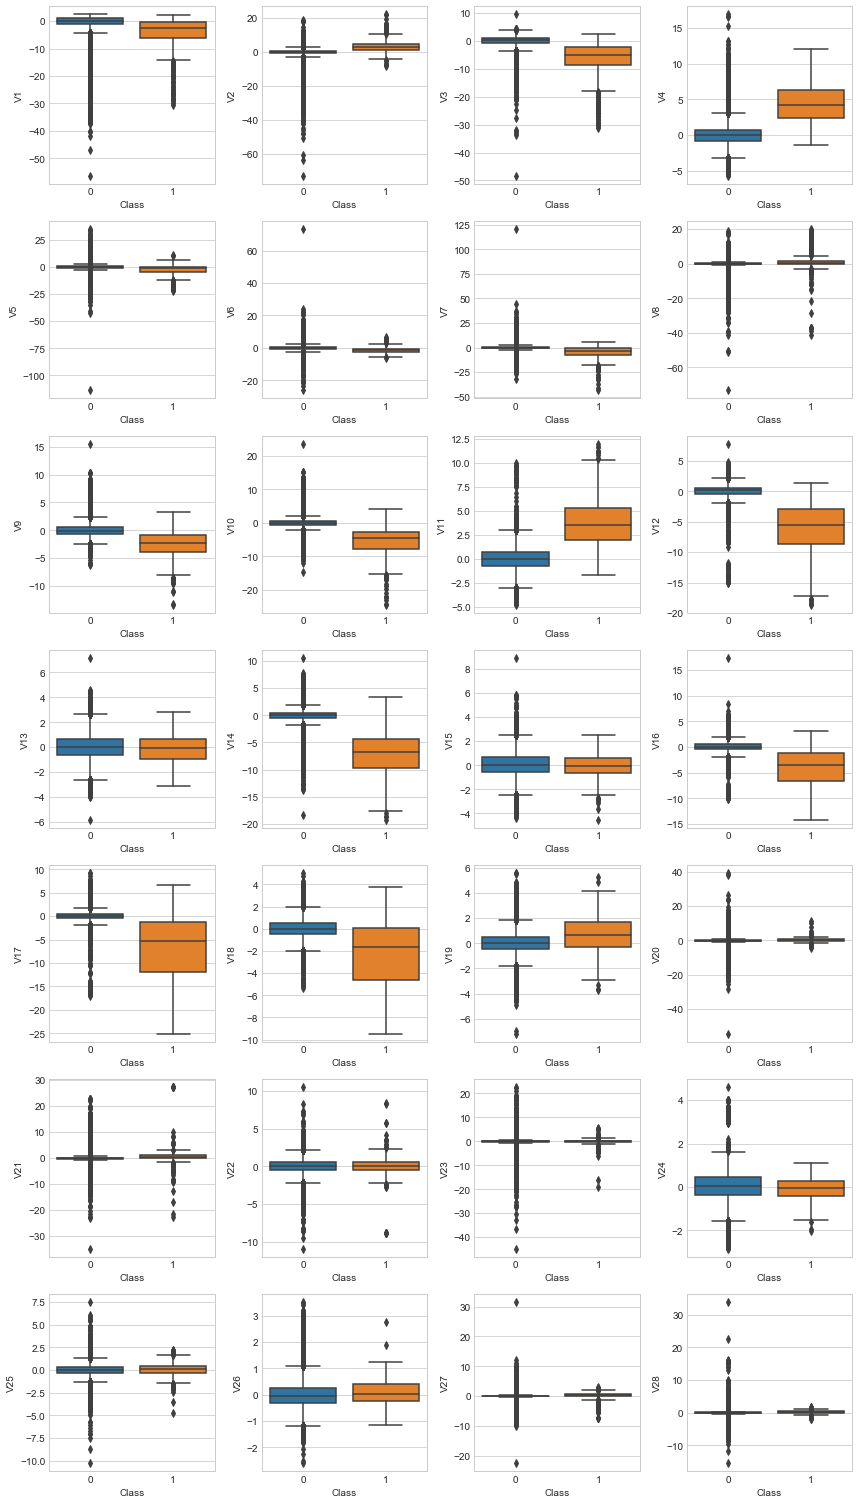

In [164]:
fig,ax = plt.subplots(nrows = 7, ncols=4, figsize=(12,21))
row = 0
col = 0
for i in range(len(creditcard.columns) -3):
    if col > 3:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = creditcard['Class'], y = creditcard[creditcard.columns[i +1]],ax = axes)
    col += 1
plt.tight_layout()
plt.show()

In [ ]:
creditcard.drop(['Time','Amount'],axis = 1,inplace=True)

In [71]:
X = creditcard.iloc[:,range(0,28)].values
y = creditcard['Class'].values

## Remove Low variance features

In [167]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = sel.fit_transform(X)
print('Remaining Features Count:\t{}'.format(X.shape[1]))

Remaining Features Count:	27


In [73]:
def print_result(title,actual, prediction,decision):
    print('****************************************************')
    print(title)
    print('****************************************************')
    print('Accuracy Score :\t\t{:.3}'.format(metrics.accuracy_score(actual, prediction)))
    # print('Precision Score :\t\t{:.3}'.format(metrics.precision_score(actual, prediction)))
    print('Recall Score :\t\t\t{:.3}'.format(metrics.recall_score(actual, prediction)))
    # print('F1 Score :\t\t\t{:.3}'.format(metrics.f1_score(actual, prediction)))
    print('Average Precision Score :\t{:.3}'.format(metrics.average_precision_score(actual, decision)))
    print('ROC AUC Score :\t\t\t{:.3}'.format(metrics.roc_auc_score(actual, decision)))
    print()

In [74]:
# split data in training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

In [76]:
C_VALUES = [0.001,0.01,0.1,1]
# build normal Model
for c_value in C_VALUES:
    pipeline = make_pipeline(LogisticRegression(random_state=42, C = c_value))
    model = pipeline.fit(X_train,y_train)
    prediction = model.predict(X_test)
    decision = model.decision_function(X_test)
    # print(metrics.confusion_matrix(y_test,prediction))
    print_result('Normal Data Logistic -> C ={}'.format(c_value), y_test,prediction,decision)

****************************************************
Normal Data Logistic -> C =0.001
****************************************************
Accuracy Score :		0.999
Recall Score :			0.537
Average Precision Score :	0.76
ROC AUC Score :			0.975

****************************************************
Normal Data Logistic -> C =0.01
****************************************************
Accuracy Score :		0.999
Recall Score :			0.578
Average Precision Score :	0.767
ROC AUC Score :			0.978

****************************************************
Normal Data Logistic -> C =0.1
****************************************************
Accuracy Score :		0.999
Recall Score :			0.592
Average Precision Score :	0.77
ROC AUC Score :			0.973

****************************************************
Normal Data Logistic -> C =1
****************************************************
Accuracy Score :		0.999
Recall Score :			0.626
Average Precision Score :	0.767
ROC AUC Score :			0.969



In [78]:
# build moodel with SMOTE - Oversampling
C_VALUES = [0.001,0.01,0.1,1]
# build normal Model
for c_value in C_VALUES:
    smote_pipeline = make_pipeline_imb(SMOTE(random_state=42),LogisticRegression(random_state=42, C = c_value))
    smote_model = smote_pipeline.fit(X_train,y_train)
    smote_prediction = smote_model.predict(X_test)
    smote_decision = smote_model.decision_function(X_test)
    # print(metrics.confusion_matrix(y_test,smote_prediction))
    print_result('SMOTE - Oversampling data(Logistic) -> C ={}'.format(c_value), y_test,smote_prediction,smote_decision)

****************************************************
SMOTE - Oversampling data(Logistic) -> C =0.001
****************************************************
Accuracy Score :		0.977
Recall Score :			0.918
Average Precision Score :	0.76
ROC AUC Score :			0.982

****************************************************
SMOTE - Oversampling data(Logistic) -> C =0.01
****************************************************
Accuracy Score :		0.976
Recall Score :			0.918
Average Precision Score :	0.767
ROC AUC Score :			0.983

****************************************************
SMOTE - Oversampling data(Logistic) -> C =0.1
****************************************************
Accuracy Score :		0.975
Recall Score :			0.918
Average Precision Score :	0.767
ROC AUC Score :			0.983

****************************************************
SMOTE - Oversampling data(Logistic) -> C =1
****************************************************
Accuracy Score :		0.975
Recall Score :			0.918
Average Precision Score :	0.767
R

In [168]:
# build moodel with  - undersampling
C_VALUES = [0.001,0.01,0.1,1]
# build normal Model
for c_value in C_VALUES:
    nearmiss_pipeline = make_pipeline_imb(NearMiss(random_state=42),LogisticRegression(random_state=42,C = c_value))
    nearmiss_model = nearmiss_pipeline.fit(X_train,y_train)
    nearmiss_decision = nearmiss_model.decision_function(X_test)
    nearmiss_prediction = nearmiss_model.predict(X_test)
    # print(metrics.confusion_matrix(y_test,smote_prediction))
    print_result('NearMiss - Undersampling data(Logistic) -> C ={}'.format(c_value), y_test,nearmiss_prediction,nearmiss_decision)

****************************************************
NearMiss - Undersampling data(Logistic) -> C =0.001
****************************************************
Accuracy Score :		0.564
Recall Score :			0.891
Average Precision Score :	0.606
ROC AUC Score :			0.901

****************************************************
NearMiss - Undersampling data(Logistic) -> C =0.01
****************************************************
Accuracy Score :		0.587
Recall Score :			0.905
Average Precision Score :	0.443
ROC AUC Score :			0.921

****************************************************
NearMiss - Undersampling data(Logistic) -> C =0.1
****************************************************
Accuracy Score :		0.616
Recall Score :			0.939
Average Precision Score :	0.224
ROC AUC Score :			0.932

****************************************************
NearMiss - Undersampling data(Logistic) -> C =1
****************************************************
Accuracy Score :		0.552
Recall Score :			0.959
Average Precisio

In [80]:
# Data Distribution 
print('Normal Data Distribution {}'.format(Counter(creditcard['Class'])))

X_SMOTE,y_SMOTE = SMOTE().fit_sample(X,y)
print('SMOTE Data Distribution {}'.format(Counter(y_SMOTE)))

X_NearMiss,y_NearMiss = NearMiss().fit_sample(X,y)
print('NearMiss Data Distribution {}'.format(Counter(y_NearMiss)))

Normal Data Distribution Counter({0: 284315, 1: 492})
SMOTE Data Distribution Counter({0: 284315, 1: 284315})
NearMiss Data Distribution Counter({0: 492, 1: 492})


In [ ]:
Conclusion: Purpose of the model to 